<a href="https://colab.research.google.com/github/Tiasha-26/Assignments-code-/blob/main/Curve%20Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [ ]:
def gauss(x,a,mu,sig):         #function for fitting using  gaussian func

  return a*np.exp((-(x-mu)**2)/(sig**2))

In [ ]:
def harmonic(x,a,b,c,d):       #function for fitting using harmonic func
  return a*np.sin(b*x-c)+d

In [ ]:
def quad(x,a,c):              #function for fitting using  quadratic func
  return a*x**2+x+c

In [ ]:
def exp(x,a,b):   #exponential function
  return a*np.exp(b*x)

In [ ]:
def pbol(x,a,b,c):  #parabolic function
  return a*(x-b)**2+c

In [ ]:
def chisq(o,e,un_cert):   #test for chi square   #o=observed values #e=expected values  #un_cert=uncertainity/error
  return ((o-e)**2)/(un_cert**2)

values of chi square (gaussian fit): 66.6149949126279
values of chi square (parabolic fit): 118545.99530269479
values of reduced chi square (gaussian fit): 0.6867525248724526
values of reduced chi square (parabolic fit): 1222.1236629143793


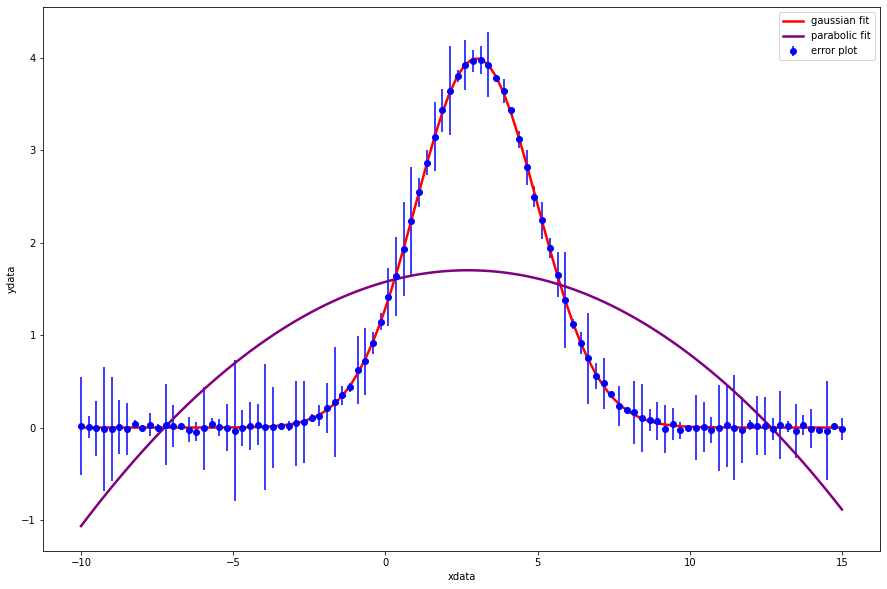

In [ ]:
f=np.loadtxt("/content/data1.txt")
xdata=f[:,0]
ydata=f[:,1]
errdata=f[:,2]
#print(xdata)
#plt.scatter(xdata,ydata)
#plt.xlim(-10,10)
plt.figure(figsize=(15,10))
plt.errorbar(xdata,ydata,yerr=errdata,fmt="o",color="blue",label="error plot")
po=[4,2.5,3]
popt,pcov=curve_fit(gauss,xdata,ydata,po)
a_opt,mu_opt,sig_opt=popt   #optimum values of parameters
#x_model=np.linspace(min(xdata),max(xdata),1000)
y_model1=gauss(xdata,a_opt,mu_opt,sig_opt)
plt.plot(xdata,y_model1,color="red",lw=2.5,label="gaussian fit")
#popt,pcov=curve_fit(quad,xdata,ydata)
#po=[4,-15]
popt,pcov=curve_fit(pbol,xdata,ydata)
#a_opt,c_opt=popt
a_opt,b_opt,c_opt=popt
#b_opt,c_opt,d_opt
y_model2=pbol(xdata,a_opt,b_opt,c_opt)
plt.plot(xdata,y_model2,color="purple",lw=2.5,label="parabolic fit")
plt.xlabel("xdata")
plt.ylabel("ydata")
plt.legend()
chi_gauss=np.sum(chisq(ydata,y_model1,errdata))  # chi square
chi_parabolic=np.sum(chisq(ydata,y_model2,errdata))
rchi_gauss=chi_gauss/(len(ydata)-3)  #reduced chi square
rchi_parabolic=chi_parabolic/(len(ydata)-3)
print("values of chi square (gaussian fit):",chi_gauss)
print("values of chi square (parabolic fit):",chi_parabolic)
print("values of reduced chi square (gaussian fit):",rchi_gauss)
print("values of reduced chi square (parabolic fit):",rchi_parabolic)
#plt.savefig("o1.pdf")

values of chi square (gaussian fit): 5573.856421040289
values of chi square (harmonic fit): 2745.2843329935426
values of reduced chi square (gaussian fit): 72.38774572779596
values of reduced chi square (harmonic fit): 36.122162276230824


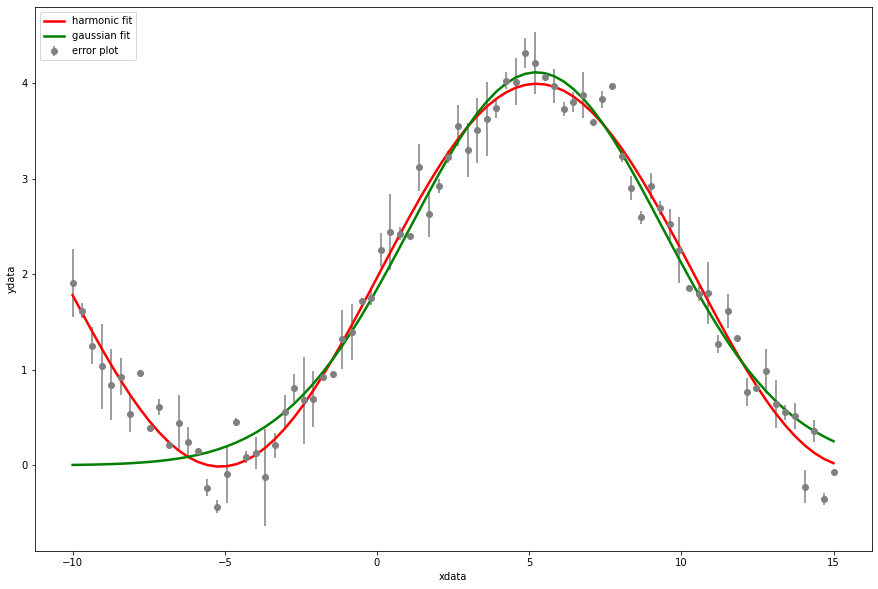

In [ ]:
f=np.loadtxt("/content/data2.txt")
xdata=f[:,0]
ydata=f[:,1]
errdata=f[:,2]
plt.figure(figsize=(15,10))
plt.errorbar(xdata,ydata,yerr=errdata,fmt="o",label="error plot",color="grey")
#plt.scatter(xdata,ydata,label="data points")
po=[4,20,5,1]
popt,pcov=curve_fit(harmonic,xdata,ydata,po)
a_opt,b_opt,c_opt,d_opt=popt
y_model1=harmonic(xdata,a_opt,b_opt,c_opt,d_opt)
plt.plot(xdata,y_model1,color="red",lw=2.5,label="harmonic fit")

plt.xlabel("xdata")
plt.ylabel("ydata")
po=[4,5,5]
popt,pcov=curve_fit(gauss,xdata,ydata,po)
a_opt,mu_opt,sig_opt=popt
y_model2=gauss(xdata,a_opt,mu_opt,sig_opt)
plt.plot(xdata,y_model2,color="green",lw=2.5,label="gaussian fit")
plt.legend(loc="upper left")
chi_gauss=np.sum(chisq(ydata,y_model2,errdata))   # chi square
chi_harmonic=np.sum(chisq(ydata,y_model1,errdata))
rchi_gauss=chi_gauss/(len(ydata)-3)  #reduced chi square
rchi_harmonic=chi_harmonic/(len(ydata)-4)
print("values of chi square (gaussian fit):",chi_gauss)
print("values of chi square (harmonic fit):",chi_harmonic)
print("values of reduced chi square (gaussian fit):",rchi_gauss)
print("values of reduced chi square (harmonic fit):",rchi_harmonic)
#plt.savefig("r1.pdf")

values of chi square (quadratic fit): 208.5990369986339
values of chi square (exponential fit): 976.5629114246935
values of reduced chi square (quadratic fit): 7.449965607094067
values of reduced chi square (exponential fit): 34.8772468365962


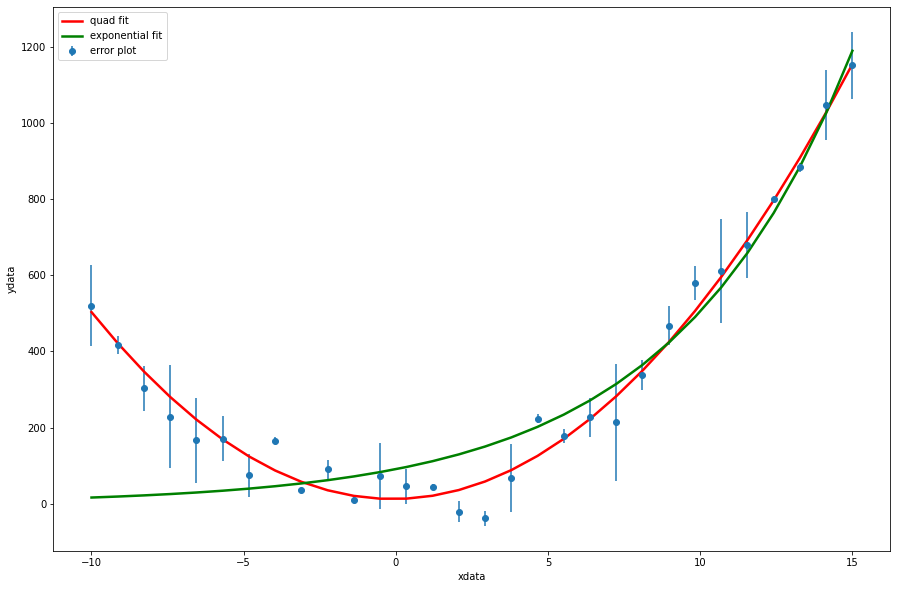

In [ ]:
f=np.loadtxt("/content/data3.txt")
xdata=f[:,0]
ydata=f[:,1]
errdata=f[:,2]
plt.figure(figsize=(15,10))
plt.errorbar(xdata,ydata,yerr=errdata,fmt="o",label="error plot")
#plt.scatter(xdata,ydata,label="data points")
po=[4,-1]
popt,pcov=curve_fit(quad,xdata,ydata,po)
a_opt,c_opt=popt
y_model1=quad(xdata,a_opt,c_opt)
plt.plot(xdata,y_model1,color="red",lw=2.5,label="quad fit")

plt.xlabel("xdata")
plt.ylabel("ydata")
po=[100,1]
popt,pcov=curve_fit(exp,xdata,ydata,po)
a_opt,b_opt=popt
y_model2=exp(xdata,a_opt,b_opt)
plt.plot(xdata,y_model2,color="green",lw=2.5,label="exponential fit")
plt.legend()
chi_quad=np.sum(chisq(ydata,y_model1,errdata))  # chi square
chi_exp=np.sum(chisq(ydata,y_model2,errdata))
rchi_quad=chi_quad/(len(ydata)-2)  #reduced chi square
rchi_exp=chi_exp/(len(ydata)-2)
print("values of chi square (quadratic fit):",chi_quad)
print("values of chi square (exponential fit):",chi_exp)
print("values of reduced chi square (quadratic fit):",rchi_quad)
print("values of reduced chi square (exponential fit):",rchi_exp)
#plt.savefig("p1.pdf")
